# Pregunta 1
## Evaluar juicios de hipótesis

$H_{0} : \mu_{0} = \mu_{1} $

$H_{0} : \mu_{0} \neq \mu_{1}$

$P = 11.83$

$P_{de corte} = 2.58$

El puntaje de prueba es muy superior al puntaje de corte rechazando la hipótesis nula. Entonces se deduce que los porcentajes son diferentes.

No se establecieron puntajes de corte, hipótesis nula o alternativas, por lo que no se puede deducir nada sobre el estudio realizado.

# Pregunta 2
## Importe la base de datos utilizada la sesión presencial anterior


In [151]:
import pandas as pn
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df = pn.read_csv('nations.csv', encoding='latin-1', index_col=0)
regiones = df['region'].unique().tolist()

for region in regiones:
    df[region] = np.where(df['region'] == region, True, False)
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa,Americas,Asia,Europe,Oceania
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,True,False,False,False,False
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,True,False,False,False,False
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,True,False,False,False,False
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,True,False,False,False,False
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,True,False,False,False,False


# Pregunta 3
## Implemente una función de prueba de hipótesis a mano

In [80]:
def funcion(df, variable, binarize):
    region = df.loc[df[binarize], variable].dropna()
    complemento_region = df.loc[df[binarize] == False, variable].dropna()
    
    media_region = region.mean()
    media_complemento_region = complemento_region.mean()
    diferencia_medias = abs(media_complemento_region - media_region)
    t, pval = stats.ttest_ind(region, complemento_region)
    print ('\n------------------')
    print ('Region: '+binarize)
    print ('Variable: '+variable) 
    print ('------------------')
    print(' La media muestral: ' + str(media_region) +
          '\n La media del mundo: ' + str(media_complemento_region) +
          '\n La diferencia entre las muestras: ' + str(diferencia_medias) +
          '\n t: '+ str(t) +
          '\n p-valor: '+ str(pval))
    

funcion(df, 'chldmort', 'Africa')
funcion(df, 'adfert', 'Africa')
funcion(df, 'life', 'Africa')


------------------
Region: Africa
Variable: chldmort
------------------
 La media muestral: 109.75
 La media del mundo: 24.74822695035461
 La diferencia entre las muestras: 85.0017730496454
 t: 14.17367667788517
 p-valor: 1.244572684496239e-31

------------------
Region: Africa
Variable: adfert
------------------
 La media muestral: 92.72115342892131
 La media del mundo: 36.834507113611195
 La diferencia entre las muestras: 55.88664631531012
 t: 9.444409431356496
 p-valor: 1.2481674170069097e-17

------------------
Region: Africa
Variable: life
------------------
 La media muestral: 56.490384542025055
 La media del mundo: 73.21114999475614
 La diferencia entre las muestras: 16.720765452731086
 t: -15.174602759471485
 p-valor: 1.0713988391633837e-34


# Pregunta 4
##  Implemente una función que grafique los histogramas para ambas muestras

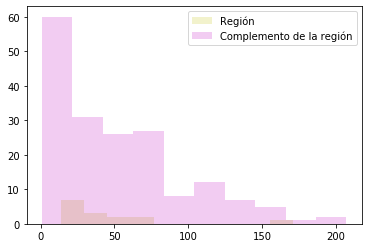

In [165]:
 def binarize_histogram(df, variable, binarize, label_1='Región', label_2 = 'Complemento de la región', alpha = .5):
    lista_colores = ['b','g','r','c','m','y','k']
    region = df.loc[df[binarize], variable].dropna()
    complemento_region = df.loc[df[binarize] == False, variable].dropna()
    color=np.random.choice(lista_colores)
    plt.hist(region, alpha=alpha, color=color, label=label_1)
    lista_colores.remove(color)
    color=np.random.choice(lista_colores)
    plt.hist(complemento_region, alpha=alpha, color=color, label=label_2 )
    plt.legend()
    plt.show()

    
binarize_histogram(df, 'adfert', 'Oceania', alpha = .2)